1. per hari (weekday vs weekend)
    - like comment vs interaction per hari bandingin weekday vs weekend
    - jumlah post per minggu (ke samping waktu, 2 akun + stacked content type)
    - perbandingan reach vs impression (baiknya berapa) (SUM)
    - promoted vs organic

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# untuk mengolah data tanggal
from datetime import datetime
from operator import attrgetter

# menghilangkan warning
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_excel('Sosmed Analysis.xlsx')
df.head()

,Month,Date,Profile Name,Channel,Content Type,Likes,Comments,Labels,Interactions,Insights - Reach,Insights - Impressions,Insights - Saves,Insights - Engagement,Insights - Video Views
0,Januari,2019-01-01 19:22:27,Orange_id,INSTAGRAM,carousel,282.0,4.0,ORGANIC,286,3732.0,7367.0,1.0,287,NaN
1,Januari,2019-01-02 17:54:18,Orange_id,INSTAGRAM,video,158.0,2.0,ORGANIC,160,3407.0,4696.0,11.0,171,1110.0
2,Januari,2019-01-03 14:37:55,Orange_id,INSTAGRAM,carousel,346.0,11.0,ORGANIC,357,4607.0,8526.0,6.0,363,NaN
3,Januari,2019-01-04 17:42:28,Orange_id,INSTAGRAM,carousel,197.0,1.0,ORGANIC,198,3412.0,6446.0,11.0,209,NaN
4,Januari,2019-01-08 14:32:41,Orange_id,INSTAGRAM,carousel,674.0,15.0,ORGANIC,689,9156.0,15817.0,134.0,823,NaN


In [31]:
df = df.dropna(subset=['Insights - Impressions','Content Type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448 entries, 0 to 453
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Month                   448 non-null    object        
 1   Date                    448 non-null    datetime64[ns]
 2   Profile Name            448 non-null    object        
 3   Channel                 448 non-null    object        
 4   Content Type            448 non-null    object        
 5   Likes                   448 non-null    float64       
 6   Comments                448 non-null    float64       
 7   Labels                  448 non-null    object        
 8   Interactions            448 non-null    int64         
 9   Insights - Reach        448 non-null    float64       
 10  Insights - Impressions  448 non-null    float64       
 11  Insights - Saves        448 non-null    float64       
 12  Insights - Engagement   448 non-null    int64         


1. Engagement adalah akumulasi dari like comment and save di instagram. Pada poin ini saya ingin melihat tren engagement dari total post yang sudah ada berdasarkan weekday or weekend

In [32]:
df['is_weekday'] = df['Date'].dt.weekday < 5
df.head()

,Month,Date,Profile Name,Channel,Content Type,Likes,Comments,Labels,Interactions,Insights - Reach,Insights - Impressions,Insights - Saves,Insights - Engagement,Insights - Video Views,is_weekday
0,Januari,2019-01-01 19:22:27,Orange_id,INSTAGRAM,carousel,282.0,4.0,ORGANIC,286,3732.0,7367.0,1.0,287,NaN,True
1,Januari,2019-01-02 17:54:18,Orange_id,INSTAGRAM,video,158.0,2.0,ORGANIC,160,3407.0,4696.0,11.0,171,1110.0,True
2,Januari,2019-01-03 14:37:55,Orange_id,INSTAGRAM,carousel,346.0,11.0,ORGANIC,357,4607.0,8526.0,6.0,363,NaN,True
3,Januari,2019-01-04 17:42:28,Orange_id,INSTAGRAM,carousel,197.0,1.0,ORGANIC,198,3412.0,6446.0,11.0,209,NaN,True
4,Januari,2019-01-08 14:32:41,Orange_id,INSTAGRAM,carousel,674.0,15.0,ORGANIC,689,9156.0,15817.0,134.0,823,NaN,True


In [33]:
df['week_number'] = df['Date'].dt.isocalendar().week
df


,Month,Date,Profile Name,Channel,Content Type,Likes,Comments,Labels,Interactions,Insights - Reach,Insights - Impressions,Insights - Saves,Insights - Engagement,Insights - Video Views,is_weekday,week_number
0,Januari,2019-01-01 19:22:27,Orange_id,INSTAGRAM,carousel,282.0,4.0,ORGANIC,286,3732.0,7367.0,1.0,287,NaN,True,1
1,Januari,2019-01-02 17:54:18,Orange_id,INSTAGRAM,video,158.0,2.0,ORGANIC,160,3407.0,4696.0,11.0,171,1110.0,True,1
2,Januari,2019-01-03 14:37:55,Orange_id,INSTAGRAM,carousel,346.0,11.0,ORGANIC,357,4607.0,8526.0,6.0,363,NaN,True,1
3,Januari,2019-01-04 17:42:28,Orange_id,INSTAGRAM,carousel,197.0,1.0,ORGANIC,198,3412.0,6446.0,11.0,209,NaN,True,1
4,Januari,2019-01-08 14:32:41,Orange_id,INSTAGRAM,carousel,674.0,15.0,ORGANIC,689,9156.0,15817.0,134.0,823,NaN,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,Maret,2019-03-30 22:54:42,Strawberry Spot,INSTAGRAM,carousel,724.0,0.0,ORGANIC,724,7376.0,15795.0,0.0,724,NaN,False,13
450,Maret,2019-03-30 23:14:09,Strawberry Spot,INSTAGRAM,carousel,1228.0,7.0,ORGANIC,1235,10939.0,22935.0,4.0,1239,NaN,False,13
451,Maret,2019-03-31 12:48:52,Strawberry Spot,INSTAGRAM,video,382.0,2.0,ORGANIC,384,8316.0,11732.0,12.0,396,2277.0,False,13
452,Maret,2019-03-31 15:29:06,Strawberry Spot,INSTAGRAM,image,1338.0,8.0,ORGANIC,1346,22875.0,32000.0,121.0,1467,NaN,False,13


In [34]:
df_clean = df[df['Labels'] == 'ORGANIC']
df_clean

,Month,Date,Profile Name,Channel,Content Type,Likes,Comments,Labels,Interactions,Insights - Reach,Insights - Impressions,Insights - Saves,Insights - Engagement,Insights - Video Views,is_weekday,week_number
0,Januari,2019-01-01 19:22:27,Orange_id,INSTAGRAM,carousel,282.0,4.0,ORGANIC,286,3732.0,7367.0,1.0,287,NaN,True,1
1,Januari,2019-01-02 17:54:18,Orange_id,INSTAGRAM,video,158.0,2.0,ORGANIC,160,3407.0,4696.0,11.0,171,1110.0,True,1
2,Januari,2019-01-03 14:37:55,Orange_id,INSTAGRAM,carousel,346.0,11.0,ORGANIC,357,4607.0,8526.0,6.0,363,NaN,True,1
3,Januari,2019-01-04 17:42:28,Orange_id,INSTAGRAM,carousel,197.0,1.0,ORGANIC,198,3412.0,6446.0,11.0,209,NaN,True,1
4,Januari,2019-01-08 14:32:41,Orange_id,INSTAGRAM,carousel,674.0,15.0,ORGANIC,689,9156.0,15817.0,134.0,823,NaN,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,Maret,2019-03-30 22:54:42,Strawberry Spot,INSTAGRAM,carousel,724.0,0.0,ORGANIC,724,7376.0,15795.0,0.0,724,NaN,False,13
450,Maret,2019-03-30 23:14:09,Strawberry Spot,INSTAGRAM,carousel,1228.0,7.0,ORGANIC,1235,10939.0,22935.0,4.0,1239,NaN,False,13
451,Maret,2019-03-31 12:48:52,Strawberry Spot,INSTAGRAM,video,382.0,2.0,ORGANIC,384,8316.0,11732.0,12.0,396,2277.0,False,13
452,Maret,2019-03-31 15:29:06,Strawberry Spot,INSTAGRAM,image,1338.0,8.0,ORGANIC,1346,22875.0,32000.0,121.0,1467,NaN,False,13


In [35]:
df_clean.to_excel('data_clean.xlsx', index=False)

In [53]:
df_result = df_clean.groupby([df_clean['Profile Name'],df_clean['week_number'], df_clean['is_weekday']])['Insights - Engagement'].median().reset_index()
df_result.columns = ['Profile Name','week_number', 'is_weekday', 'mean_engagement']
df_result['mean_engagement'] = round(df_result['mean_engagement'])
df_result

,Profile Name,week_number,is_weekday,mean_engagement
0,Orange_id,1,True,248.0
1,Orange_id,2,False,575.0
2,Orange_id,2,True,510.0
3,Orange_id,3,True,396.0
4,Orange_id,4,True,145.0
5,Orange_id,5,False,745.0
6,Orange_id,5,True,205.0
7,Orange_id,6,False,305.0
8,Orange_id,6,True,306.0
9,Orange_id,7,True,400.0


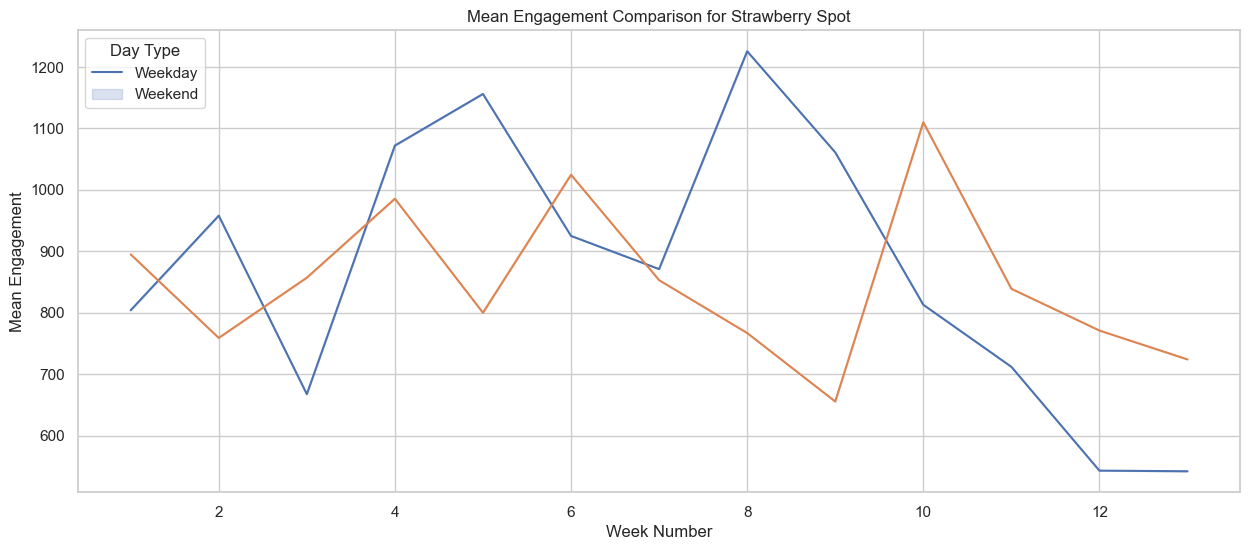

In [54]:
df_strawberry = df_clean[df_clean['Profile Name'] == 'Strawberry Spot'].reset_index()
df_strawberry = df_strawberry.drop(columns='index',axis=1)
df_strawberry['is_weekday'] = df_strawberry['is_weekday'].replace(True,'weekday')
df_strawberry['is_weekday'] = df_strawberry['is_weekday'].replace(False,'weekend')
df_strawberry

plt.figure(figsize=(15, 6))

ax = sns.lineplot(x=df_strawberry['week_number'].astype('int64'),y=df_strawberry['Insights - Engagement'],hue=df_strawberry['is_weekday'],estimator=np.median,errorbar=("ci",0))

# Add labels and title
plt.xlabel('Week Number')
plt.ylabel('Mean Engagement')
plt.title('Mean Engagement Comparison for Strawberry Spot')
plt.legend(title='Day Type', loc='upper left', labels=['Weekday', 'Weekend'])

# # Calculate mean values for each hue category
# mean_values = df_strawberry.groupby(['is_weekday', 'week_number'])['Insights - Engagement'].mean().reset_index()

# # # Add annotations for mean values
# # for index, row in mean_values.iterrows():
# #     plt.annotate(f"{row['Insights - Engagement']:.2f}", 
# #                  (row['week_number'], row['Insights - Engagement']), 
# #                  textcoords="offset points", 
# #                  xytext=(0,1), 
# #                  ha='center')

plt.show()


Insight : 
- Tidak dapat ditarik kesimpulan tentang perbedaan post weekend dan weekday
- Terlihat hasil yang sangat fluktuatif
- Tandanya user ketika materi sudah siap untuk terbit, bisa langsung dipublish tanpa harus menunggu waktu seperti weekend

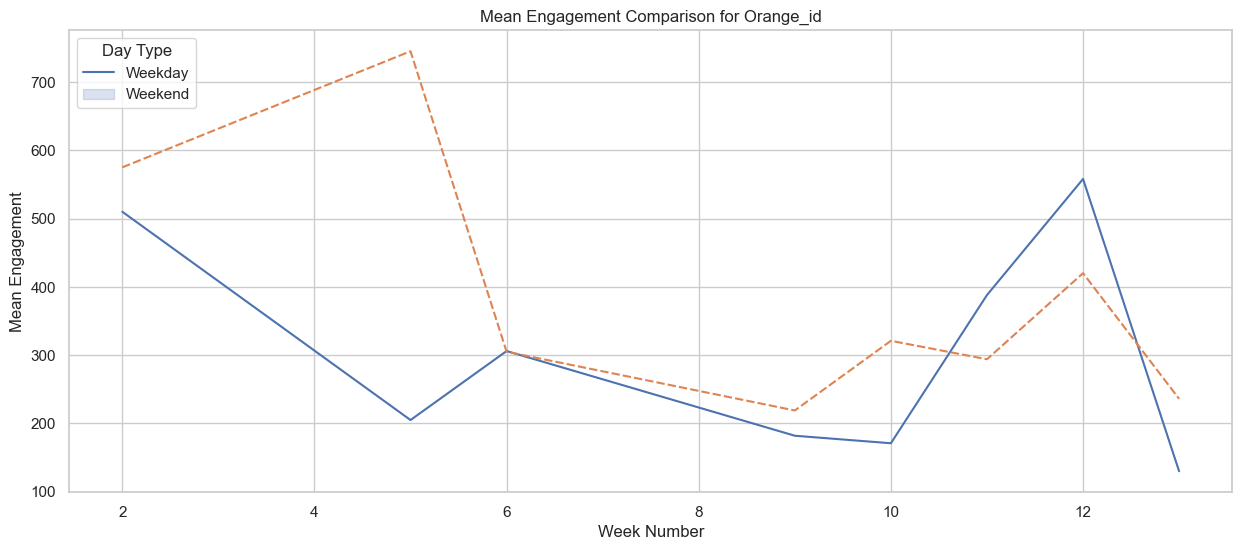

In [55]:
df_orange = df_result[df_result['Profile Name'] == 'Orange_id'].reset_index()
df_orange = df_orange.drop(columns='index',axis=1)
df_orange['is_weekday'] = df_orange['is_weekday'].replace(True,'weekday')
df_orange['is_weekday'] = df_orange['is_weekday'].replace(False,'weekend')
df_orange

df_pivot = df_orange.pivot(index='week_number',columns='is_weekday',values='mean_engagement')
df_pivot = df_pivot.dropna()
df_pivot.index = df_pivot.index.astype('int64')

plt.figure(figsize=(15, 6))

ax = sns.lineplot(data=df_pivot,errorbar=("ci",0))

# Add labels and title
plt.xlabel('Week Number')
plt.ylabel('Mean Engagement')
plt.title('Mean Engagement Comparison for Orange_id')
plt.legend(title='Day Type', loc='upper left', labels=['Weekday', 'Weekend'])

# # Calculate mean values for each hue category
# mean_values = df_strawberry.groupby(['is_weekday', 'week_number'])['Insights - Engagement'].mean().reset_index()

# # # Add annotations for mean values
# # for index, row in mean_values.iterrows():
# #     plt.annotate(f"{row['Insights - Engagement']:.2f}", 
# #                  (row['week_number'], row['Insights - Engagement']), 
# #                  textcoords="offset points", 
# #                  xytext=(0,1), 
# #                  ha='center')

plt.show()

Insight : 
- Tidak dapat ditarik kesimpulan tentang perbedaan post weekend dan weekday bahkan ketika akun tersebut tidak post setiap hari
- Terlihat hasil yang sangat fluktuatif
- Tandanya user ketika materi sudah siap untuk terbit, bisa langsung dipublish tanpa harus menunggu waktu seperti weekend

4. Kali ini saya ingin melihat korelasi antara kolom like, comment, reach dan imporession untuk masing masing content type

<Axes: xlabel='Likes', ylabel='Count'>

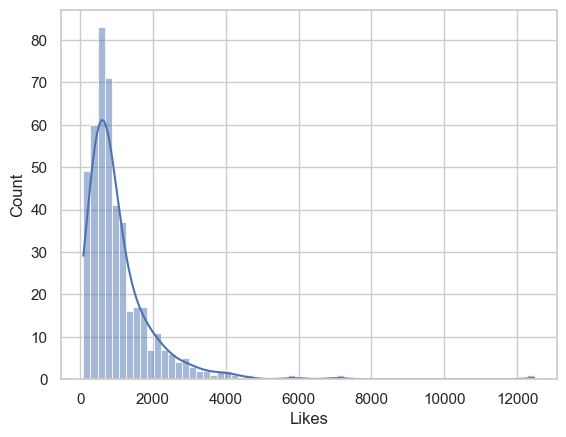

In [39]:
# sebelum menggunakan heatmap, kita melihat dulu distribusi dari salah satu kolom contohnya like, kita memakai database awal dikarenakan hanya kami hanya ingin melihat korelasinya saja

sns.histplot(x=df['Likes'],kde=True)

In [40]:
# kita coba juga berdasarkan uji normalitas
# Shapiro Wilk Test
from scipy.stats import shapiro

stat, pvalue = shapiro(df['Likes'])

if pvalue > 0.05:
    # Ho
    print(f'''Pvalue= {pvalue}. pvalue > 0.05. Gagal menolak Ho. Data Terdistribus Normal
        ''')
else:
    # Ha
    print(f'''Pvalue= {pvalue}. pvalue <= 0.05. Berhasil menolak Ho. Data Tidak Terdistribus Normal
        ''')



Pvalue= 5.611532125153157e-29. pvalue <= 0.05. Berhasil menolak Ho. Data Tidak Terdistribus Normal
        


Text(0.5, 1.0, 'Korelasi antara kolom likes vs comments vs reach vs impression untuk content type image')

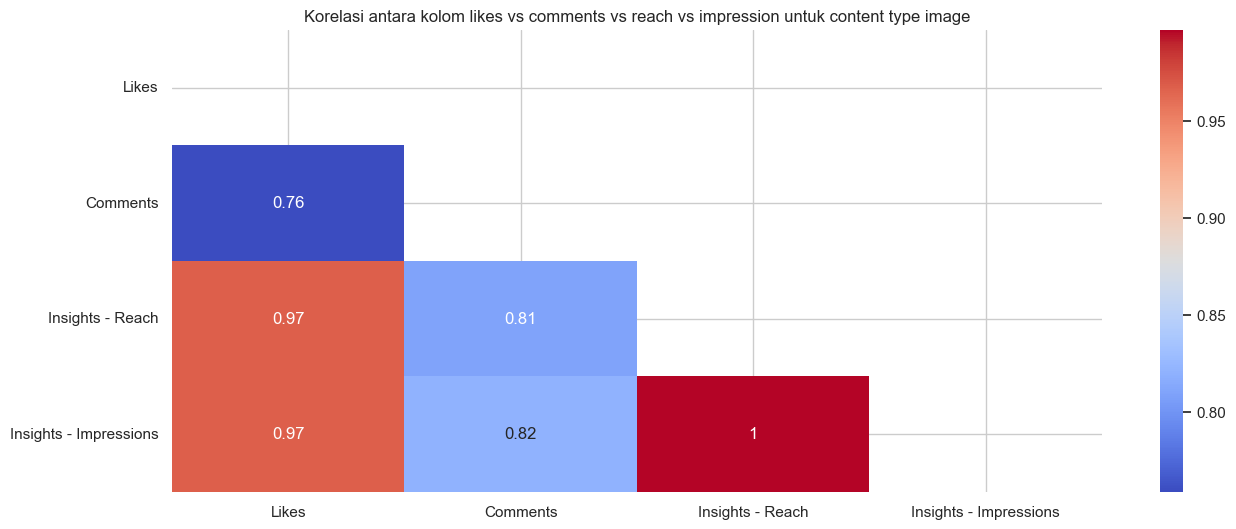

In [41]:
# untuk melihat korelasi, kita bisa menggunakan heatmap

# 1. Korelasi untuk content type image
plt.figure(figsize=(15,6))
sns.heatmap(df[df['Content Type']=='image'][['Likes','Comments','Insights - Reach','Insights - Impressions']].corr('spearman'),annot=True,cmap='coolwarm',mask=np.triu(df[df['Content Type']=='image'][['Likes','Comments','Insights - Reach','Insights - Impressions']].corr('spearman')))
plt.title('Korelasi antara kolom likes vs comments vs reach vs impression untuk content type image')

Text(0.5, 1.0, 'Korelasi antara kolom likes vs comments vs reach vs impression untuk content type carousel')

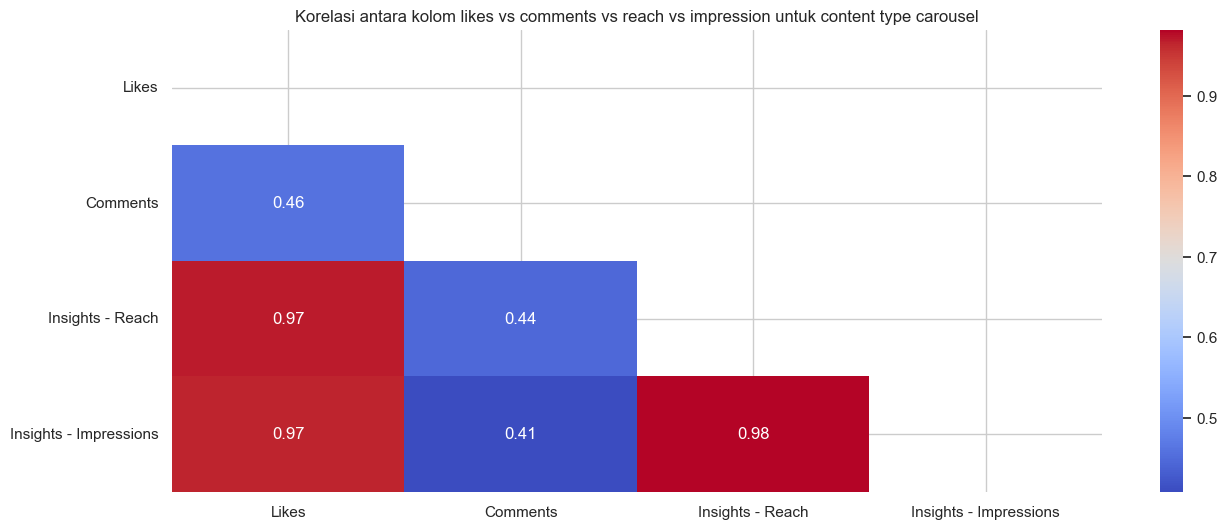

In [63]:
# untuk melihat korelasi, kita bisa menggunakan heatmap

# 2. Korelasi untuk content type carousel
plt.figure(figsize=(15,6))
sns.heatmap(df[df['Content Type']=='carousel'][['Likes','Comments','Insights - Reach','Insights - Impressions']].corr('spearman'),annot=True,cmap='coolwarm',mask=np.triu(df[df['Content Type']=='carousel'][['Likes','Comments','Insights - Reach','Insights - Impressions']].corr('spearman')))
plt.title('Korelasi antara kolom likes vs comments vs reach vs impression untuk content type carousel')

Text(0.5, 1.0, 'Korelasi antara kolom likes vs comments vs reach vs impression vs video views untuk content type video')

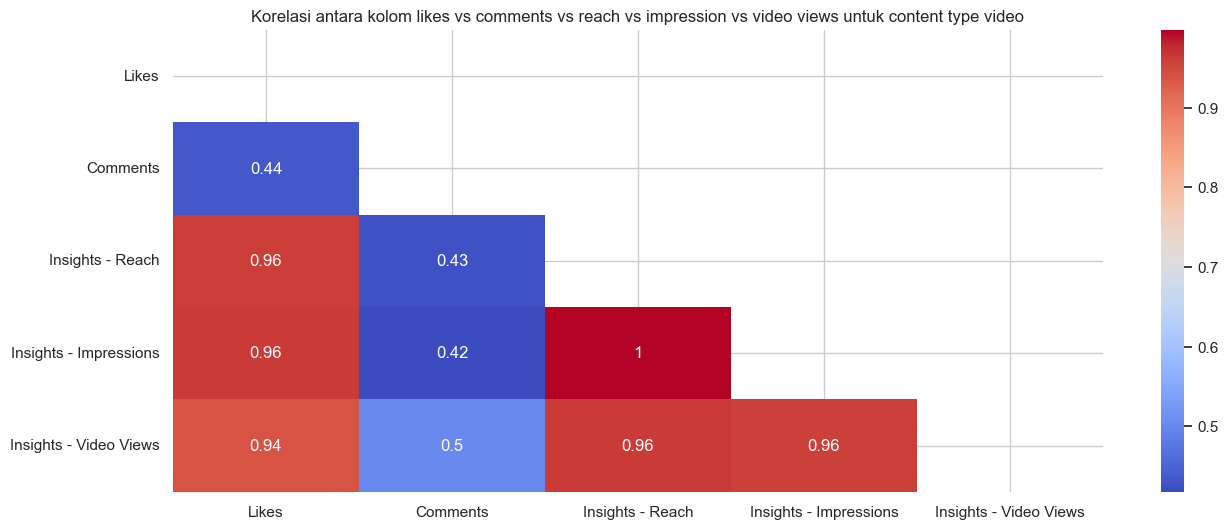

In [43]:
# untuk melihat korelasi, kita bisa menggunakan heatmap

# 3. Korelasi untuk content type video
plt.figure(figsize=(15,6))
sns.heatmap(df[df['Content Type']=='video'][['Likes','Comments','Insights - Reach','Insights - Impressions','Insights - Video Views']].corr('spearman'),annot=True,cmap='coolwarm',mask=np.triu(df[df['Content Type']=='video'][['Likes','Comments','Insights - Reach','Insights - Impressions','Insights - Video Views']].corr('spearman')))
plt.title('Korelasi antara kolom likes vs comments vs reach vs impression vs video views untuk content type video')

Insight :
- Terdapat korelasi yang sangat kuat antara impression reach dan likes untuk masing masing content type
- Untuk comment, korelasi kuat hanya terjadi pada content type image, yang lainnya bersifat moderate
- Hal ini mungkin dikarenakan konten image hanya berisi 1 gambar yang kurang mungkin informatif sehingga tidak ada kebanyakan hanya like saja tidak sampai comment

5. Melihat Reach / Impression / Engagement pada 1 grafik menggunakan lineplot

In [56]:
df_insight = df_clean.groupby(df_clean['week_number'])[['Insights - Reach','Insights - Impressions','Insights - Engagement']].median().reset_index()
df_insight['week_number'] = df_insight['week_number'].astype('int64')
df_insight

,week_number,Insights - Reach,Insights - Impressions,Insights - Engagement
0,1,14763.0,19226.5,812.0
1,2,14618.5,19465.0,798.5
2,3,11935.5,15835.5,667.5
3,4,16297.0,20867.0,911.0
4,5,15817.5,20691.0,981.0
5,6,14240.0,18711.0,879.0
6,7,13023.0,18503.0,808.0
7,8,17316.0,23230.5,1105.0
8,9,9732.5,13805.5,562.5
9,10,12804.0,17288.0,765.0


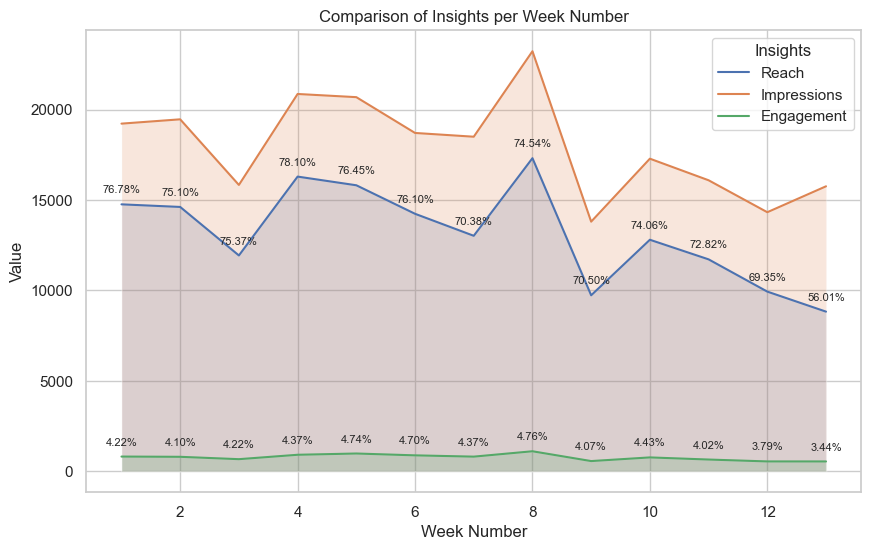

In [57]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_insight, x='week_number', y='Insights - Reach', label='Reach', markers=True)
sns.lineplot(data=df_insight, x='week_number', y='Insights - Impressions', label='Impressions', markers=True)
sns.lineplot(data=df_insight, x='week_number', y='Insights - Engagement', label='Engagement', markers=True)

# Calculate percentage of Insights / Impressions
df_insight['Reach Percentage'] = (df_insight['Insights - Reach'] / df_insight['Insights - Impressions']) * 100
df_insight['Engagement Percentage'] = (df_insight['Insights - Engagement'] / df_insight['Insights - Impressions']) * 100


# Fill area under the lines
plt.fill_between(df_insight['week_number'], df_insight['Insights - Reach'], alpha=0.2)
plt.fill_between(df_insight['week_number'], df_insight['Insights - Impressions'], alpha=0.2)
plt.fill_between(df_insight['week_number'], df_insight['Insights - Engagement'], alpha=0.2)


# Add annotations for Reach Percentage and Engagement Percentage
for index, row in df_insight.iterrows():
    plt.annotate(f'{row["Reach Percentage"]:.2f}%', (row['week_number'], row['Insights - Reach']), textcoords="offset points", xytext=(0,8), ha='center',fontsize=8)
    plt.annotate(f'{row["Engagement Percentage"]:.2f}%', (row['week_number'], row['Insights - Engagement']), textcoords="offset points", xytext=(0,8), ha='center',fontsize=8)

# Add labels and title
plt.xlabel('Week Number')
plt.ylabel('Value')
plt.title('Comparison of Insights per Week Number')
plt.legend(title='Insights')

plt.show()

Insight :
- Kami telah mencoba untuk 2 akun dan hasilnya kurang lebih sama, maka dari itu kami memutuskan untuk menggabungkan grafik ini untuk kedua akun
- Dapat dilihat bahwa karena memiliki korelasi yang kuat seperti poin diatas tadi, impression vs reach vs engagement memiliki pergeseran naik turun yang sama untuk setiap minggunya
- reach / impression memiliki nilai di range 67% - 76%
- engagement / impression memiliki nilai diantara 4-6%
- Dan sesuai hasil diskusi dengan user, nilai tersebut masuk ke dalam kategori Good Engagement Rate (3-6%)

6. Karena pergeseran naik turun untuk reach, impression, dan engagement relatif sama. Kali ini kami ingin melihat perbandingan content type terhadap salah satu dari nilai tersebut.

Kita coba bandingkan untuk content type vs impression

In [60]:
df_content = df_clean.groupby([df_clean['Content Type'],df_clean['week_number']])['Insights - Impressions'].median().reset_index()
df_content.columns = ['Content Type','week_number', 'mean_impressions']
df_content['mean_impressions'] = round(df_content['mean_impressions'])
df_content

,Content Type,week_number,mean_impressions
0,carousel,1,7367.0
1,carousel,2,15817.0
2,carousel,3,8128.0
3,carousel,4,28836.0
4,carousel,5,12460.0
5,carousel,6,6931.0
6,carousel,7,9117.0
7,carousel,9,6531.0
8,carousel,10,7652.0
9,carousel,11,11070.0


<Axes: xlabel='week_number', ylabel='mean_impressions'>

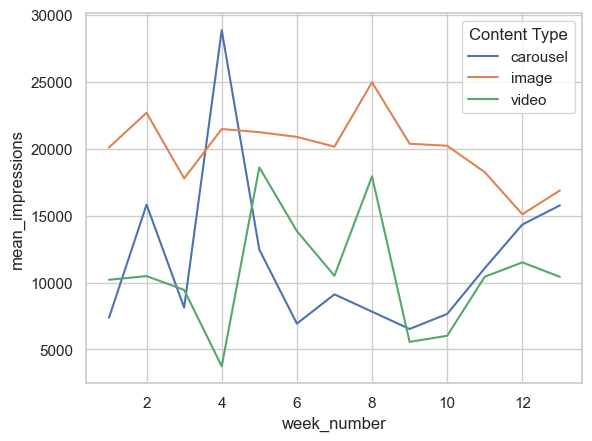

In [61]:
sns.lineplot(x=df_content['week_number'].astype('int64'),y=df_content['mean_impressions'],hue=df_content['Content Type'])

Insight : 
- Secara garis besar, nilai untuk konten bertipe image lebih bagus dari rata-rata impresinya namun ada salah 1 data anomali pada minggu keempat bahwa carousel melonjak jauh pada minggu tersebut
- Untuk carousel dan video secara garis besar memiliki nilai yang fluktuatif untuk keduanya, untuk beberapa minggu carousel diatas video begitupun sebaliknya

Review :
- Cek dulu median
- point nomor 2 bisa ditunjukkin dulu pie chartnya
- scatter plot bisa per akun dulu aja
- business problem dan konklusi